In [1]:
from functions import *

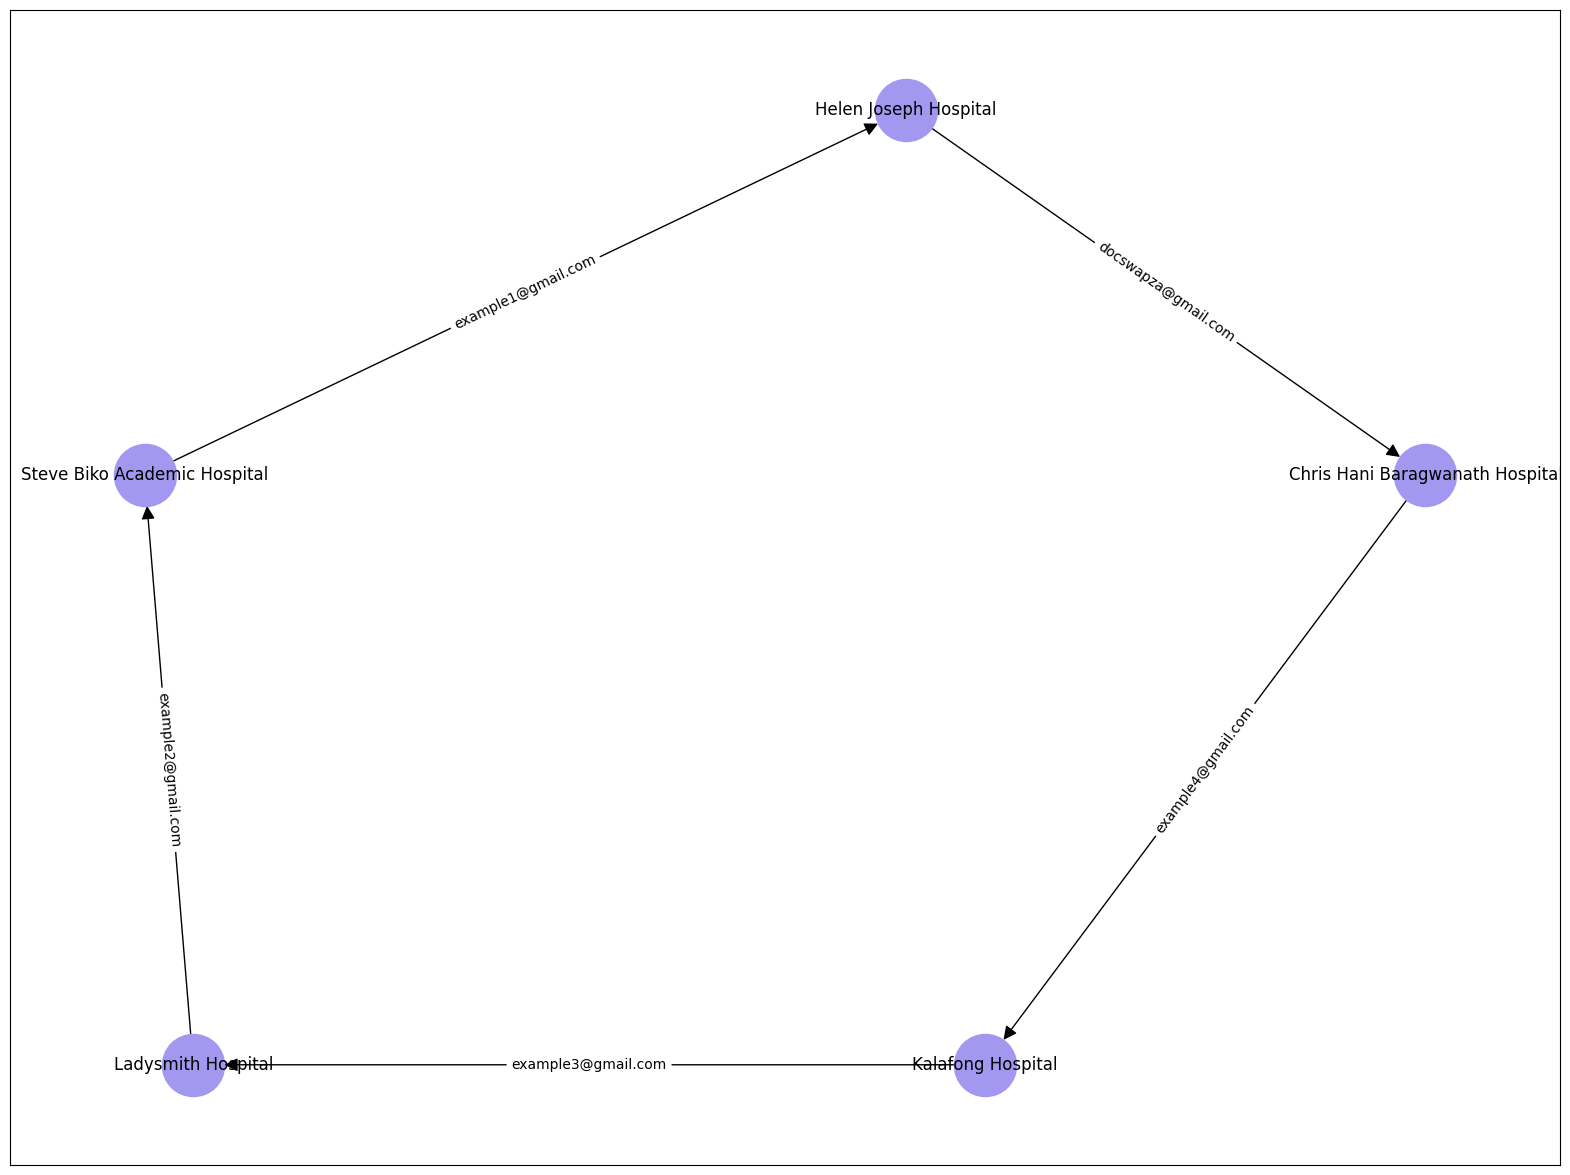

In [12]:
G = nx.MultiDiGraph()

G.add_edge('Helen Joseph Hospital', "Chris Hani Baragwanath Hospital")
G.add_edge("Steve Biko Academic Hospital", "Helen Joseph Hospital")
G.add_edge("Ladysmith Hospital", "Steve Biko Academic Hospital")
G.add_edge("Kalafong Hospital", "Ladysmith Hospital")
G.add_edge('Chris Hani Baragwanath Hospital', "Kalafong Hospital")



edge_labels = {
    ('Helen Joseph Hospital', "Chris Hani Baragwanath Hospital"): str("docswapza@gmail.com"),
    ("Steve Biko Academic Hospital", "Helen Joseph Hospital"): str("example1@gmail.com"),
    ("Ladysmith Hospital", "Steve Biko Academic Hospital"): str("example2@gmail.com"),
    ("Kalafong Hospital", "Ladysmith Hospital"): str("example3@gmail.com"),
    ('Chris Hani Baragwanath Hospital', "Kalafong Hospital"): str(f"example4@gmail.com")
}


# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
# nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels = True)
# plt.show()


figsize = (20,15)
pos = nx.spectral_layout(G)

fig = plt.figure(1, figsize=figsize, dpi=100)
nx.draw_networkx(
    G,
    pos=pos,
    with_labels=True,
    width=1,
    arrowsize=20,
    node_size=2000,
    node_color="#A398F0",
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.savefig("demo_swap.png")

In [2]:
#connect to google sheets
gs_connection = connect_to_gs("gcp_service_account.json")

In [3]:
#pull all data submitted via forms
user_submissions = fetch_google_sheets_data(gs_connection, user_submissions_table, prod_google_sheet_key, [])
user_status = fetch_google_sheets_data(gs_connection, user_status_table, prod_google_sheet_key, [])

In [4]:
user_submissions

,timestamp,email,current_placement,first_choice,second_choice,third_choice,I consent to having my email shared with potential swap partners for the purpose of swapping placements
0,9/9/2023 15:18:28,user0@example.com,hospital_60,hospital_21,hospital_47,hospital_39,yes
1,9/9/2023 15:18:28,user1@example.com,hospital_44,hospital_19,hospital_35,hospital_32,yes
2,9/9/2023 15:18:28,user2@example.com,hospital_50,hospital_19,hospital_13,hospital_26,yes
3,9/9/2023 15:18:28,user3@example.com,hospital_29,hospital_59,hospital_34,hospital_2,yes
4,9/9/2023 15:18:28,user4@example.com,hospital_63,hospital_29,hospital_50,hospital_43,yes
...,...,...,...,...,...,...,...
995,9/9/2023 15:18:28,user995@example.com,hospital_53,hospital_51,hospital_24,hospital_39,yes
996,9/9/2023 15:18:28,user996@example.com,hospital_53,hospital_39,hospital_17,hospital_7,yes
997,9/9/2023 15:18:28,user997@example.com,hospital_45,hospital_37,hospital_0,hospital_63,yes
998,9/9/2023 15:18:28,user998@example.com,hospital_3,hospital_15,hospital_31,hospital_49,yes


In [5]:
user_status

,email,swapped,updated_at


In [6]:
user_status, new_submissions = update_user_status(user_submissions, user_status)
# if new_submissions is not None:
#     write_google_sheets_data(gs_connection, new_submissions, user_status_table, prod_google_sheet_key)

In [7]:
user_status

,email,swapped,updated_at
0,user249@example.com,no,09/09/2023 15:22:19
1,user679@example.com,no,09/09/2023 15:22:19
2,user152@example.com,no,09/09/2023 15:22:19
3,user387@example.com,no,09/09/2023 15:22:19
4,user652@example.com,no,09/09/2023 15:22:19
...,...,...,...
995,user831@example.com,no,09/09/2023 15:22:19
996,user367@example.com,no,09/09/2023 15:22:19
997,user37@example.com,no,09/09/2023 15:22:19
998,user945@example.com,no,09/09/2023 15:22:19


In [8]:
new_submissions

,email,swapped,updated_at
0,user249@example.com,no,09/09/2023 15:22:19
1,user679@example.com,no,09/09/2023 15:22:19
2,user152@example.com,no,09/09/2023 15:22:19
3,user387@example.com,no,09/09/2023 15:22:19
4,user652@example.com,no,09/09/2023 15:22:19
...,...,...,...
995,user831@example.com,no,09/09/2023 15:22:19
996,user367@example.com,no,09/09/2023 15:22:19
997,user37@example.com,no,09/09/2023 15:22:19
998,user945@example.com,no,09/09/2023 15:22:19


In [9]:
user_status, update_flag = get_reapplications(user_submissions, user_status)

In [10]:
update_flag

In [11]:
selection_pool = generate_selection_pool(user_submissions, user_status, n_sample, 1)

In [12]:
selection_pool

,email,timestamp,current_placement,first_choice,second_choice,third_choice
507,user557@example.com,2023-09-09 15:18:28,hospital_56,hospital_10,hospital_7,hospital_44
818,user837@example.com,2023-09-09 15:18:28,hospital_64,hospital_44,hospital_30,hospital_42
452,user507@example.com,2023-09-09 15:18:28,hospital_63,hospital_45,hospital_31,hospital_64
368,user431@example.com,2023-09-09 15:18:28,hospital_54,hospital_52,hospital_33,hospital_19
242,user318@example.com,2023-09-09 15:18:28,hospital_47,hospital_0,hospital_67,hospital_3
...,...,...,...,...,...,...
709,user739@example.com,2023-09-09 15:18:28,hospital_4,hospital_36,hospital_52,hospital_64
370,user433@example.com,2023-09-09 15:18:28,hospital_55,hospital_13,hospital_17,hospital_25
241,user317@example.com,2023-09-09 15:18:28,hospital_11,hospital_31,hospital_51,hospital_24
964,user969@example.com,2023-09-09 15:18:28,hospital_26,hospital_7,hospital_44,hospital_68


In [13]:
#step 5: melt selection pool
melted_selection_pool_df = melt_choices(selection_pool, choice_max)
melted_selection_pool_df

,email,current_placement,choice_number,choice
167,user105@example.com,hospital_38,2.0,hospital_30
92,user105@example.com,hospital_38,1.0,hospital_46
219,user115@example.com,hospital_60,2.0,hospital_40
144,user115@example.com,hospital_60,1.0,hospital_36
201,user130@example.com,hospital_31,2.0,hospital_43
...,...,...,...,...
162,user972@example.com,hospital_49,2.0,hospital_65
164,user975@example.com,hospital_12,2.0,hospital_3
89,user975@example.com,hospital_12,1.0,hospital_19
199,user997@example.com,hospital_45,2.0,hospital_0


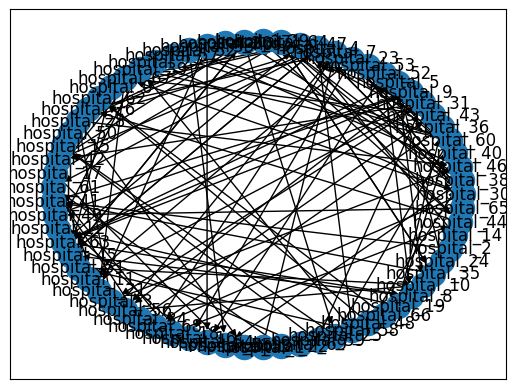

In [14]:
G = nx.MultiDiGraph()

for i in melted_selection_pool_df.index:
    G.add_edge(melted_selection_pool_df.choice[i], melted_selection_pool_df.current_placement[i], edge_key=i, weight=melted_selection_pool_df.choice_number[i])
nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels = True)
plt.show()

In [15]:
cycles = list(nx.simple_cycles(G))

In [16]:

if len(cycles) > 0:
    #step 8: generate average weight per edge to assess cycle quality
    cycle_data = []
    for cycle in cycles:
        cycle_length = len(cycle)
        cycle.append(cycle[0])  
        path_wt = nx.path_weight(G, cycle, 'weight')
        avg_wt = path_wt / cycle_length
        cycle_data.append({
            'cycle': cycle,
            'weight': path_wt,
            'avg_weight_per_edge': avg_wt,
            'cycle_len': cycle_length
        })

    cycle_df = pd.DataFrame(cycle_data)
    cycle_df = cycle_df.sort_values(by=["avg_weight_per_edge", "cycle_len"], ascending=[True, False])
cycle_df

,cycle,weight,avg_weight_per_edge,cycle_len
36055,"[hospital_63, hospital_8, hospital_45, hospita...",3.0,1.000000,3
53147,"[hospital_23, hospital_30, hospital_23]",2.0,1.000000,2
15552,"[hospital_29, hospital_44, hospital_35, hospit...",12.0,1.090909,11
31654,"[hospital_29, hospital_28, hospital_4, hospita...",12.0,1.090909,11
52078,"[hospital_46, hospital_38, hospital_64, hospit...",10.0,1.111111,9
...,...,...,...,...
49423,"[hospital_28, hospital_46, hospital_32, hospit...",16.0,2.000000,8
38314,"[hospital_63, hospital_5, hospital_31, hospita...",6.0,2.000000,3
53124,"[hospital_64, hospital_33, hospital_64]",4.0,2.000000,2
53153,"[hospital_45, hospital_4, hospital_45]",4.0,2.000000,2


In [17]:
best_cycles = remove_overlapping_cycles(cycle_df)
best_cycles = best_cycles[best_cycles.avg_weight_per_edge<=avg_weight_per_edge_threshold]
best_cycles

,cycle,weight,avg_weight_per_edge,cycle_len
36055,"[hospital_63, hospital_8, hospital_45, hospita...",3.0,1.000000,3
53147,"[hospital_23, hospital_30, hospital_23]",2.0,1.000000,2
15552,"[hospital_29, hospital_44, hospital_35, hospit...",12.0,1.090909,11


In [18]:
#generate_swaps(gs_connection,best_cycles, melted_selection_pool_df, G, user_status)

In [19]:
n_bunch = best_cycles.iloc[0,0]
n_bunch

['Hospital 7', 'Hospital 3', 'Hospital 5', 'Hospital 7']

In [20]:
G2 = nx.subgraph(G, nbunch=n_bunch)
edge_list = list(G2.edges(data=True))

In [21]:
edge_list

[('Hospital 3', 'Hospital 5', {'edge_key': 21, 'weight': 2.0}),
 ('Hospital 3', 'Hospital 7', {'edge_key': 23, 'weight': 2.0}),
 ('Hospital 5', 'Hospital 7', {'edge_key': 12, 'weight': 1.0}),
 ('Hospital 5', 'Hospital 7', {'edge_key': 31, 'weight': 3.0}),
 ('Hospital 7', 'Hospital 3', {'edge_key': 9, 'weight': 1.0})]

In [22]:
consecutive_edges = []
n_bunch_indices = {node: [] for node in n_bunch}
unique_edges = {}


# Build the dictionary of node indices in n_bunch
for idx, node in enumerate(n_bunch):
    n_bunch_indices[node].append(idx)

In [23]:
n_bunch_indices

{'Hospital 7': [0, 3], 'Hospital 3': [1], 'Hospital 5': [2]}

In [24]:
def check_consecutive(tuple_to_check, n_bunch):
    # Iterate through the list to find the first occurrence of the first element in the tuple
    for i in range(len(n_bunch)):
        if n_bunch[i] == tuple_to_check[0]:
            # Check if the remaining elements of the tuple occur consecutively in the list
            for j in range(1, len(tuple_to_check)):
                if i + j >= len(n_bunch) or n_bunch[i + j] != tuple_to_check[j]:
                    return False
            return True
    return False

In [28]:
check_consecutive(('Hospital 5', 'Hospital 7'), n_bunch)

True

In [31]:
# Iterate through edge_list and check for consecutive nodes
for (node1, node2, edge_data) in edge_list:
    edge_weight = edge_data['weight']
    edge_key = edge_data['edge_key']
    is_consecutive = check_consecutive((node1, node2), n_bunch)

    if is_consecutive and ((node1, node2) not in unique_edges or edge_weight < unique_edges[(node1, node2)]['weight']):
        unique_edges[(node1, node2)] = {'weight': edge_weight, 'edge_key': edge_key}

In [32]:
unique_edges

{('Hospital 3', 'Hospital 5'): {'weight': 2.0, 'edge_key': 21},
 ('Hospital 5', 'Hospital 7'): {'weight': 1.0, 'edge_key': 12},
 ('Hospital 7', 'Hospital 3'): {'weight': 1.0, 'edge_key': 9}}

In [ ]:
for node1, node2, melted_row in edge_list:
    node1_indices = n_bunch_indices[node1]
    node2_indices = n_bunch_indices[node2]
    edge_weight = G2.get_edge_data(*(node1, node2, melted_row))['weight']

    for idx1 in node1_indices:
        for idx2 in node2_indices:
            if idx1 - idx2 == -1:
                edge_pair = (node1, node2) 
                if edge_pair not in unique_edges:
                    consecutive_edges.append(melted_row)
                    unique_edges.add(edge_pair)

In [23]:
for iteration, n_bunch in enumerate(best_cycles.cycle, start=1):
    G2 = nx.subgraph(G, nbunch=n_bunch)
    edge_list = list(G2.edges(data=True))

    consecutive_edges = []
    n_bunch_indices = {node: [] for node in n_bunch}
    unique_edges = {}

    # Build the dictionary of node indices in n_bunch
    for idx, node in enumerate(n_bunch):
        n_bunch_indices[node].append(idx)


    # Iterate through edge_list and check for consecutive nodes
    for (node1, node2, edge_data) in edge_list:
        edge_weight = edge_data['weight']
        edge_key = edge_data['edge_key']

        if (node1, node2) not in unique_edges:
            unique_edges[(node1, node2)] = {'weight': edge_weight, 'edge_key': edge_key}

        else:
            prev_weight = unique_edges[(node1, node2)]['weight']
            if edge_weight < prev_weight:
                unique_edges[(node1, node2)] = {'weight': edge_weight, 'edge_key': edge_key}

    edge_keys_list = [edge_data['edge_key'] for edge_data in unique_edges.values()]

    final_edge_df = melted_selection_pool_df.loc[edge_keys_list, :]

In [24]:
final_edge_df

,email,current_placement,choice_number,choice
37,alwit05@gmail.com,Hospital 5,3.0,Hospital 6
28,courtswhitfield1@gmail.com,Hospital 6,2.0,Hospital 5


In [19]:
n_bunch = ['Hospital 3', 'Hospital 2', 'Hospital 3']

consecutive_edges = []
n_bunch_indices = {node: [] for node in n_bunch}
unique_edges = {}

In [20]:
unique_edges

{}

In [21]:
# Build the dictionary of node indices in n_bunch
for idx, node in enumerate(n_bunch):
    n_bunch_indices[node].append(idx)


In [22]:
n_bunch_indices

{'Hospital 3': [0, 2], 'Hospital 2': [1]}

In [23]:
edge_list = [('Hospital 2', 'Hospital 3', {'edge_key': 38, 'weight': 3.0}),
            ('Hospital 3', 'Hospital 2', {'edge_key': 12, 'weight': 1.0}),
            ('Hospital 3', 'Hospital 2', {'edge_key': 15, 'weight': 1.0}),
            ('Hospital 2', 'Hospital 3', {'edge_key': 17, 'weight': 1.0})]
edge_list

[('Hospital 2', 'Hospital 3', {'edge_key': 38, 'weight': 3.0}),
 ('Hospital 3', 'Hospital 2', {'edge_key': 12, 'weight': 1.0}),
 ('Hospital 3', 'Hospital 2', {'edge_key': 15, 'weight': 1.0}),
 ('Hospital 2', 'Hospital 3', {'edge_key': 17, 'weight': 1.0})]

In [24]:
unique_edges

{}

In [25]:
for (node1, node2, edge_data) in edge_list:
    edge_weight = edge_data['weight']
    edge_key = edge_data['edge_key']

    if (node1, node2) not in unique_edges:
        unique_edges[(node1, node2)] = {'weight': edge_weight, 'edge_key': edge_key}

    else:
        prev_weight = unique_edges[(node1, node2)]['weight']
        if edge_weight < prev_weight:
            unique_edges[(node1, node2)] = {'weight': edge_weight, 'edge_key': edge_key}

edge_keys_list = [edge_data['edge_key'] for edge_data in unique_edges.values()]
edge_keys_list
final_edge_df = melted_selection_pool_df.loc[edge_keys_list, :]
final_edge_df

Hospital 2 Hospital 3 {'edge_key': 38, 'weight': 3.0}
Hospital 3 Hospital 2 {'edge_key': 12, 'weight': 1.0}
Hospital 3 Hospital 2 {'edge_key': 15, 'weight': 1.0}
Hospital 2 Hospital 3 {'edge_key': 17, 'weight': 1.0}


,email,current_placement,choice_number,choice
17,devhodgson@gmail.com,Hospital 3,1.0,Hospital 2
12,Carladek1@gmail.com,Hospital 2,1.0,Hospital 3


In [26]:
unique_edges

{('Hospital 2', 'Hospital 3'): {'weight': 1.0, 'edge_key': 17},
 ('Hospital 3', 'Hospital 2'): {'weight': 1.0, 'edge_key': 12}}

In [27]:
edge_keys_list = [edge_data['edge_key'] for edge_data in unique_edges.values()]
edge_keys_list

[17, 12]

In [50]:
for iteration, n_bunch in enumerate(best_cycles.cycle, start=1):
    G2 = nx.subgraph(G, nbunch=n_bunch)
    edge_list = list(G2.edges(data=True))

    consecutive_edges = []
    n_bunch_indices = {node: [] for node in n_bunch}
    unique_edges = {}

    # Build the dictionary of node indices in n_bunch
    for idx, node in enumerate(n_bunch):
        n_bunch_indices[node].append(idx)

    for (node1, node2, edge_data) in edge_list:
        edge_weight = edge_data['weight']

        if (node1, node2) in unique_edges:
            prev_weight = unique_edges[(node1, node2)]['weight']
            if edge_weight < prev_weight:
                consecutive_edges[unique_edges[(node1, node2)]['index']] = None  # Mark previous edge as None

        unique_edges[(node1, node2)] = {'weight': edge_weight, 'index': len(consecutive_edges)}

        consecutive_edges.append((node1, node2))

# Filter out None-marked edges from consecutive_edges if needed
consecutive_edges = [edge for edge in consecutive_edges if edge is not None]


In [51]:
consecutive_edges

[('Hospital 2', 'Hospital 3'),
 ('Hospital 3', 'Hospital 2'),
 ('Hospital 3', 'Hospital 2')]

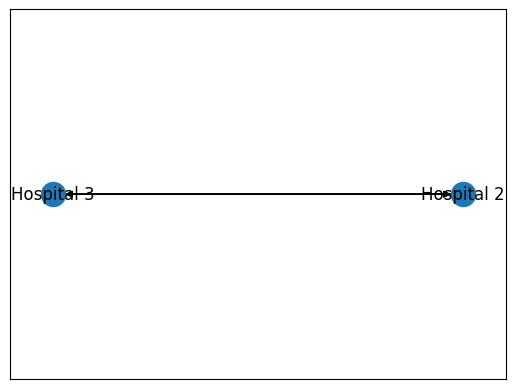

In [25]:
#loops through each cycle in best_cycles
# for iteration, n_bunch in enumerate(best_cycles.cycle, start=1):
#     G2 = nx.subgraph(G, nbunch=n_bunch)
#     edge_list = list(G2.edges)


#will manually set top cycle for now
n_bunch =  best_cycles.iloc[0,0]
G2 = nx.subgraph(G, nbunch=n_bunch)
nx.draw_networkx(G2, pos=nx.circular_layout(G2), with_labels = True)
plt.show()

In [52]:
#this sub graph has two cycles in it, one is better than the other 
edge_list = list(G2.edges(data=True))
edge_list

[('Hospital 2', 'Hospital 3', {'weight': 3.0}),
 ('Hospital 2', 'Hospital 3', {'weight': 1.0}),
 ('Hospital 3', 'Hospital 2', {'weight': 1.0}),
 ('Hospital 3', 'Hospital 2', {'weight': 1.0})]

In [27]:
#creates a dictionary of the hospitals and which indiexes they occur in nbunch: {'Hospital 2': [0, 2], 'Hospital 3': [1]}
consecutive_edges = []
n_bunch_indices = {node: [] for node in n_bunch}
unique_edges = set()

# Build the dictionary of node indices in n_bunch
for idx, node in enumerate(n_bunch):
    n_bunch_indices[node].append(idx)

In [39]:
for node1, node2, melted_row in edge_list:
    node1_indices = n_bunch_indices[node1]
    node2_indices = n_bunch_indices[node2]
    edge_weight = G2.get_edge_data(*(node1, node2, melted_row))['weight']

    for idx1 in node1_indices:
        for idx2 in node2_indices:
            if idx1 - idx2 == -1:
                edge_pair = (node1, node2) 
                if edge_pair not in unique_edges:
                    consecutive_edges.append(melted_row)
                    unique_edges.add(edge_pair)

In [33]:
for iteration, n_bunch in enumerate(best_cycles.cycle, start=1):
    G2 = nx.subgraph(G, nbunch=n_bunch)
    edge_list = list(G2.edges) 

    """ edge_list = [('Hospital 2', 'Hospital 3', 38),
                    ('Hospital 2', 'Hospital 3', 17),
                    ('Hospital 3', 'Hospital 2', 12),
                    ('Hospital 3', 'Hospital 2', 15)]"""

    consecutive_edges = []
    n_bunch_indices = {node: [] for node in n_bunch}
    unique_edges = set()

    # Build the dictionary of node indices in n_bunch
    for idx, node in enumerate(n_bunch):
        n_bunch_indices[node].append(idx)

    for node1, node2, key in edge_list:
        node1_indices = n_bunch_indices[node1]
        node2_indices = n_bunch_indices[node2]
        edge_weight = G2.get_edge_data(*(node1, node2, key))['weight']

        for idx1 in node1_indices:
            for idx2 in node2_indices:
                if idx1 - idx2 == -1:
                    edge_pair = (node1, node2) 
                    if edge_pair not in unique_edges:
                        consecutive_edges.append(key)
                        unique_edges.add(edge_pair)


[1]

In [44]:
for iteration, n_bunch in enumerate(best_cycles.cycle, start=1):
    G2 = nx.subgraph(G, nbunch=n_bunch)
    edge_list = list(G2.edges(data=True))

    consecutive_edges = []
    n_bunch_indices = {node: [] for node in n_bunch}
    unique_edges = {}

    # Build the dictionary of node indices in n_bunch
    for idx, node in enumerate(n_bunch):
        n_bunch_indices[node].append(idx)

    for (node1, node2, edge_data) in edge_list:
        edge_weight = edge_data['weight']

        if (node1, node2) in unique_edges:
            prev_weight = unique_edges[(node1, node2)]['weight']
            if edge_weight < prev_weight:
                consecutive_edges[unique_edges[(node1, node2)]['index']] = None  # Mark previous edge as None

        unique_edges[(node1, node2)] = {'weight': edge_weight, 'index': len(consecutive_edges)}

        consecutive_edges.append((node1, node2))

# Filter out None-marked edges from consecutive_edges if needed
consecutive_edges = [edge for edge in consecutive_edges if edge is not None]


In [45]:
consecutive_edges

[('Hospital 6', 'Hospital 5'),
 ('Hospital 6', 'Hospital 5'),
 ('Hospital 5', 'Hospital 6')]